# Analyze Taylor Swift Lyrics with Python

[The original dataset was curated by Jan Llenzl Dagohoy and published on Kaggle](https://www.kaggle.com/datasets/thespacefreak/taylor-swift-song-lyrics-all-albums)

In [32]:
# Import relevant libraries

import pandas as pd
from sklearn.feature_extraction import text # importing stop words
import matplotlib.pyplot as plt

#### 1. Combine CSV files

In [3]:
files = ['taylor_swift_song_lyrics\\01-taylor_swift.csv', 'taylor_swift_song_lyrics\\02-fearless_taylors_version.csv', 'taylor_swift_song_lyrics\\03-speak_now_deluxe_package.csv', 'taylor_swift_song_lyrics\\04-red_deluxe_edition.csv', 'taylor_swift_song_lyrics\\05-1989_deluxe.csv', 'taylor_swift_song_lyrics\\06-reputation.csv', 'taylor_swift_song_lyrics\\07-lover.csv', 'taylor_swift_song_lyrics\\08-folklore_deluxe_version.csv', 'taylor_swift_song_lyrics\\09-evermore_deluxe_version.csv'] 
 
# Read each csv file and store them in a list
dataframe = [pd.read_csv(file) for file in files]   

# Concatenante the data
combined_data = pd.concat(dataframe, ignore_index=True)

# Saved the combined data to a csv file
combined_data.to_csv('taylor_swift_song_lyrics\\taylor_swift_lyrics.csv', index=False)

# Check the first 5 rows
print(combined_data.head())

     album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  
0          He said the way my blue eyes shined     1  
1  Put those Georgia stars to shame that night     2  
2                       I said, "That's a lie"     3  
3                  Just a boy in a Chevy truck     4  
4         That had a tendency of gettin' stuck     5  


In [4]:
# Check the info of the combined data
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   8358 non-null   object
 1   track_title  8358 non-null   object
 2   track_n      8358 non-null   int64 
 3   lyric        8358 non-null   object
 4   line         8358 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 326.6+ KB
None


#### 2. Add album year

In [5]:
# Check existing album
print(combined_data['album_name'].unique())

['Taylor Swift' 'Fearless (Taylor’s Version)' 'Speak Now (Deluxe)'
 'Red (Deluxe Edition)' '1989 (Deluxe)' 'reputation' 'Lover'
 'folklore (deluxe version)' 'evermore (deluxe version)']


In [39]:
def release_year(album_name):
    if 'Taylor Swift' in album_name:
        return 2006
    elif 'fearless' in album_name:
        return 2008
    elif 'speak_now' in album_name:
        return 2010
    elif 'red' in album_name:
        return 2012
    elif '1989' in album_name:
        return 2014
    elif 'reputation' in album_name:
        return 2017
    elif 'lover' in album_name:
        return 2019
    elif 'folklore' in album_name:
        return 2020
    elif 'evermore' in album_name:
        return 2020
    else:
        return None
    
# Apply the function to the album_name column
combined_data['release_year'] = combined_data['album_name'].apply(release_year)

print(combined_data.head())

     album_name track_title  track_n  \
0  Taylor Swift  Tim McGraw        1   
1  Taylor Swift  Tim McGraw        1   
2  Taylor Swift  Tim McGraw        1   
3  Taylor Swift  Tim McGraw        1   
4  Taylor Swift  Tim McGraw        1   

                                         lyric  line  release_year  \
0          He said the way my blue eyes shined     1        2006.0   
1  Put those Georgia stars to shame that night     2        2006.0   
2                       I said, "That's a lie"     3        2006.0   
3                  Just a boy in a Chevy truck     4        2006.0   
4         That had a tendency of gettin' stuck     5        2006.0   

                 clean_lyric                 clean_lyric_list  midnight_lyric  \
0  said way blue eyes shined  [said, way, blue, eyes, shined]           False   
1  georgia stars shame night   [georgia, stars, shame, night]           False   
2         said, "that's lie"           [said,, "that's, lie"]           False   
3       just b

#### 3. Clean the lyrics text
To accurately count keyword mentions, we need to make everything lowercase everything, remove punctuation, and exclude stop words.

- Change everything to lower case and save the result in a new column called clean_lyric.
- Remove punctuation and save the result to the existing clean_lyric column.
- Remove stopwords.


In [40]:
# Change lyrics to lowercase
combined_data['clean_lyric'] = combined_data['lyric'].str.lower()


In [41]:
# Remove punctuation
combined_data['clean_lyric'] = combined_data['clean_lyric'].str.replace(r'[^\w\s\" "\ ,\.\']', '')
print(combined_data['clean_lyric'])

0               he said the way my blue eyes shined
1       put those georgia stars to shame that night
2                            i said, "that's a lie"
3                       just a boy in a chevy truck
4              that had a tendency of gettin' stuck
                           ...                     
8353         you know, you know, you know, you know
8354                           when it's time to go
8355                                 so then you go
8356                                    then you go
8357                                    you just go
Name: clean_lyric, Length: 8358, dtype: object


In [42]:
skl_stopwords = text.ENGLISH_STOP_WORDS
print(skl_stopwords)
#create a small list of English stop words, feel free to edit this list



frozenset({'six', 'before', 'next', 'onto', 'former', 'us', 'show', 'until', 'himself', 'done', 'i', 'four', 'towards', 'each', 'who', 'part', 'into', 'move', 'nowhere', 'afterwards', 'thus', 'those', 'no', 'though', 'any', 'to', 'never', 'amount', 'thereby', 'off', 'else', 'by', 'up', 'thru', 'five', 'themselves', 'the', 'been', 'was', 'with', 'therein', 'sixty', 'few', 'amongst', 'others', 'toward', 'because', 'do', 'thick', 'becomes', 'enough', 'this', 'whereby', 'something', 'everywhere', 'how', 'there', 'mine', 'yourself', 'noone', 'must', 'see', 'more', 'keep', 'mostly', 'some', 'it', 'made', 'also', 'their', 'anywhere', 'they', 'either', 'empty', 'you', 'seems', 'here', 'our', 'of', 'in', 'within', 'down', 'system', 'give', 'bottom', 'after', 'moreover', 'hers', 'mill', 'anyone', 'eg', 'is', 'most', 'same', 'might', 'except', 'whereupon', 'as', 'per', 'am', 'own', 'around', 'herself', 'side', 'less', 'all', 'hasnt', 'someone', 'full', 'its', 'will', 'twelve', 'therefore', 'cant'

In [43]:
# Split the lyrics into words
combined_data['clean_lyric_list'] = combined_data['clean_lyric'].str.split()
print(combined_data['clean_lyric_list'].head())

0         [he, said, the, way, my, blue, eyes, shined]
1    [put, those, georgia, stars, to, shame, that, ...
2                         [i, said,, "that's, a, lie"]
3                  [just, a, boy, in, a, chevy, truck]
4         [that, had, a, tendency, of, gettin', stuck]
Name: clean_lyric_list, dtype: object


In [44]:
# Remove stop words
combined_data['clean_lyric_list'] = combined_data['clean_lyric_list'].apply(lambda x: [item for item in x if item not in skl_stopwords])
print(combined_data['clean_lyric_list'].head())

0    [said, way, blue, eyes, shined]
1     [georgia, stars, shame, night]
2             [said,, "that's, lie"]
3          [just, boy, chevy, truck]
4         [tendency, gettin', stuck]
Name: clean_lyric_list, dtype: object


In [45]:
# Re-join the words into a string
combined_data['clean_lyric'] = combined_data['clean_lyric_list'].str.join(' ')
print(combined_data['clean_lyric'])

0       said way blue eyes shined
1       georgia stars shame night
2              said, "that's lie"
3            just boy chevy truck
4          tendency gettin' stuck
                  ...            
8353       know, know, know, know
8354                    it's time
8355                             
8356                             
8357                         just
Name: clean_lyric, Length: 8358, dtype: object


#### 4. Find keyword mentions

- Create a new column to indicate if a lyric has "midnight"in it.
- Check how may times midnight occurs

In [46]:
def midnight_lyric(lyric):
    if 'midnight' in lyric:
        return True
    else:
        return False

combined_data['midnight_lyric'] = combined_data['clean_lyric'].apply(midnight_lyric)
print(combined_data['midnight_lyric'].value_counts())

midnight_lyric
False    8349
True        9
Name: count, dtype: int64


#### 5. Expand the keyword list
Midnight might not be the only way that Taylor Swift has talked about night. We need to expand our list. We've made a list of night words.
- Join the lists into a regular expression string using the .join() function and the | to indicate "or"
- Create a new column for each word category (day, night, time) that evaluates the clean lyrics for the presence of the words in the regular expression.
- Count how many times the words appeared and print the result to the screen


In [47]:
#night, day, and other time-related words
night = ['night','midnight', 'dawn', 'dusk', 'evening', 'late', 'dark', '1am', '2am', '3am', '4am']
day = ['day', 'morning', 'light', 'sun', 'dawn', 'noon', 'golden', 'bright']
time = ['today', 'tomorrow', 'yesterday']

In [48]:
# Create a regex string for each list of words
night_regex = r'\b(?:{})\b'.format('|'.join(night))
day_regex = r'\b(?:{})\b'.format('|'.join(day))
time_regex = r'\b(?:{})\b'.format('|'.join(time))

# Create a new column for each list of words
combined_data['night_lyric'] = combined_data['clean_lyric'].str.contains(night_regex, case=False)
combined_data['day_lyric'] = combined_data['clean_lyric'].str.contains(day_regex, case=False)
combined_data['time_lyric'] = combined_data['clean_lyric'].str.contains(time_regex, case=False)

print(combined_data['night_lyric'].value_counts())
print(combined_data['day_lyric'].value_counts())
print(combined_data['time_lyric'].value_counts())

night_lyric
False    8175
True      183
Name: count, dtype: int64
day_lyric
False    8206
True      152
Name: count, dtype: int64
time_lyric
False    8323
True       35
Name: count, dtype: int64


#### 6. Visualize how Taylor Swift's mentions of time have changed over time.
Now that we know that she has referenced time, we can see if that has changed, and if she has been dropping any hints about her upcoming album.

- Create a new dataframe called yearly_mentions that groups her mentions by year, and takes the sum of the other columns. Reset the index on this DataFrame to make it easier to use with matplotlib
- Create a line chart in matplotlib showing the night mentions over time.

In [49]:
# Create a new dataframe to group the mentions of night, day, and time-related words by year
yearly_mentions = pd.DataFrame()

yearly_mentions['night'] = combined_data.groupby('release_year')['night_lyric'].sum()
yearly_mentions['day'] = combined_data.groupby('release_year')['day_lyric'].sum()
yearly_mentions['time'] = combined_data.groupby('release_year')['time_lyric'].sum()
print(yearly_mentions['night'])
print(yearly_mentions['day'])
print(yearly_mentions['time'])

release_year
2006.0    16
2014.0    25
2017.0    16
2020.0    18
Name: night, dtype: int64
release_year
2006.0    16
2014.0    17
2017.0    12
2020.0    33
Name: day, dtype: int64
release_year
2006.0    3
2014.0    0
2017.0    0
2020.0    1
Name: time, dtype: int64


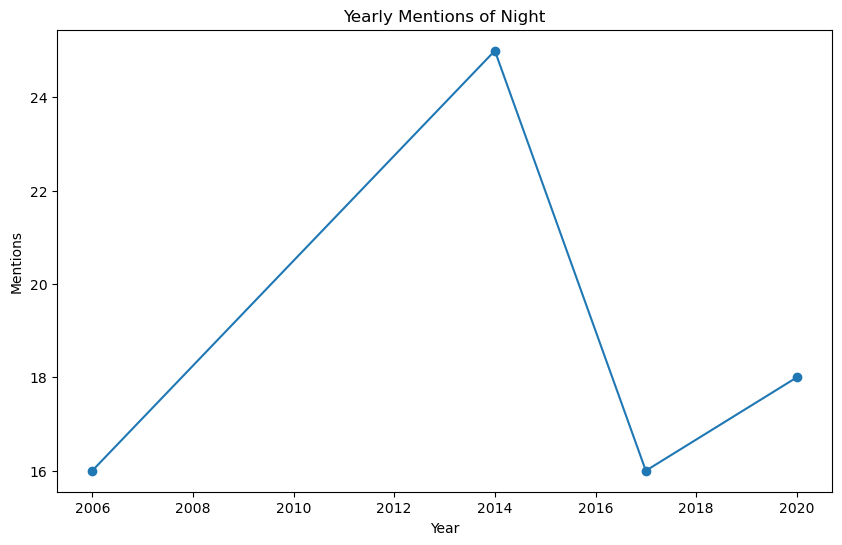

In [50]:
# Plot the yearly mentions of night 
plt.figure(figsize=(10, 6))
plt.plot(yearly_mentions['night'], marker='o')
plt.title('Yearly Mentions of Night')
plt.xlabel('Year')
plt.ylabel('Mentions')
plt.show()

#### 7. What albums are the most night/day focused?

In [54]:
# Group the data by album and count the number of mentions of night
album_night_mentions = combined_data.groupby('album_name')['night_lyric'].sum()
print(album_night_mentions)

album_name
1989 (Deluxe)                  25
Fearless (Taylor’s Version)    37
Lover                          20
Red (Deluxe Edition)           28
Speak Now (Deluxe)             23
Taylor Swift                   16
evermore (deluxe version)      13
folklore (deluxe version)       5
reputation                     16
Name: night_lyric, dtype: int64


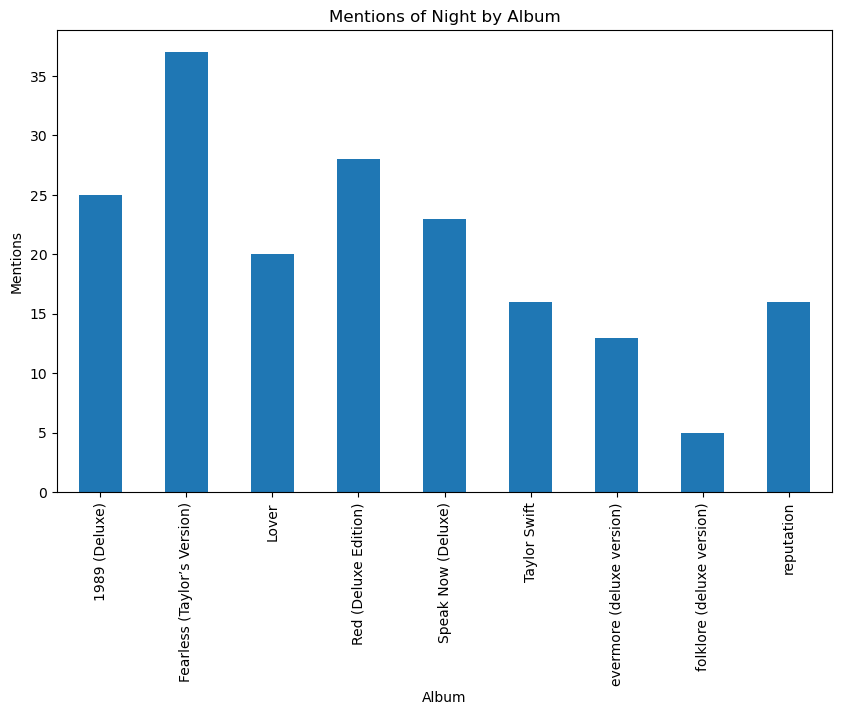

In [55]:
#  Plot the mentions of night by album
plt.figure(figsize=(10, 6))
album_night_mentions.plot(kind='bar')
plt.title('Mentions of Night by Album')
plt.xlabel('Album')
plt.ylabel('Mentions')
plt.show()


Based on the above chart, we could see that night time was mentioned the most in Fearless album (37 times).

In [56]:
# Album which mention day time the most
album_day_mentions = combined_data.groupby('album_name')['day_lyric'].sum()
print(album_day_mentions)

album_name
1989 (Deluxe)                  17
Fearless (Taylor’s Version)    28
Lover                          12
Red (Deluxe Edition)           12
Speak Now (Deluxe)             22
Taylor Swift                   16
evermore (deluxe version)      27
folklore (deluxe version)       6
reputation                     12
Name: day_lyric, dtype: int64


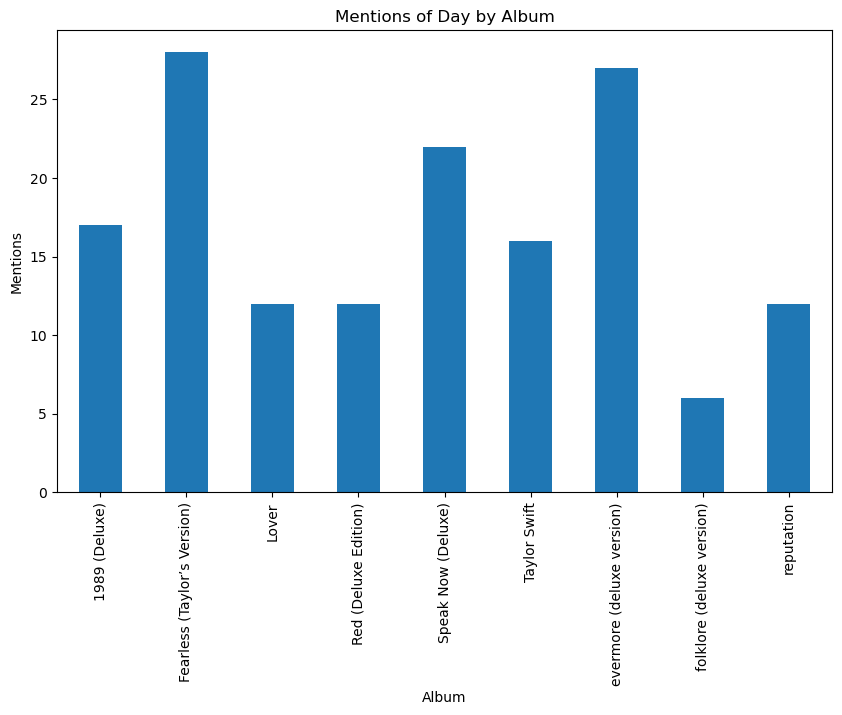

In [57]:
# Visualize the mentions of day by album
plt.figure(figsize=(10, 6))
album_day_mentions.plot(kind='bar')
plt.title('Mentions of Day by Album')
plt.xlabel('Album')
plt.ylabel('Mentions')
plt.show()


Overall, fearless album mentions both day and night time the most in comparison to the remaining album.
Another highlight would be evermore album is the second highest album that mention day time, but does not mention night time a lot.

#### 8. Compare day to night mentions

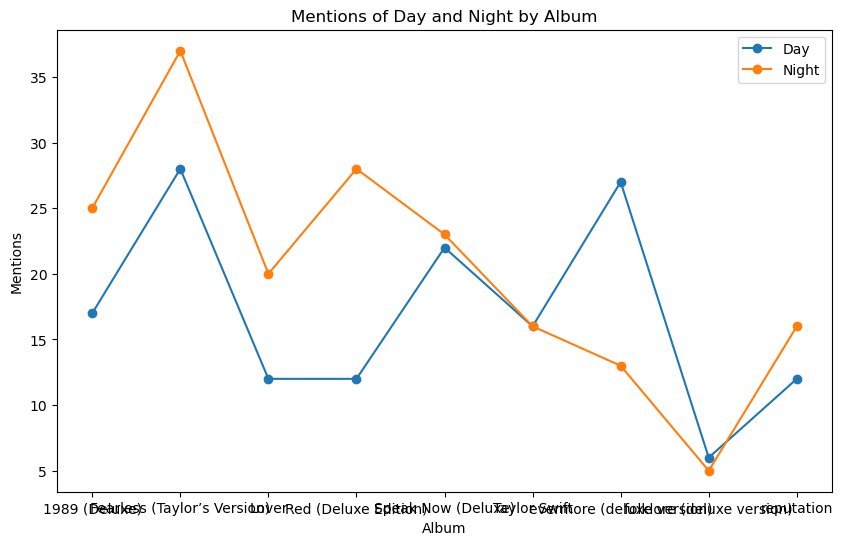

In [58]:
# Line chart that compares day and night mentions by album
plt.figure(figsize=(10, 6))
plt.plot(album_day_mentions, marker='o', label='Day')
plt.plot(album_night_mentions, marker='o', label='Night')
plt.title('Mentions of Day and Night by Album')
plt.xlabel('Album')
plt.ylabel('Mentions')
plt.legend()
plt.show()

We see a similar dip in referencing time around 2017, but a sharp increase in both 2019 and 2020 to reference day.

#### 9. Investigate position of day vs night mentions within albums
- Create a variable that indicates the position of a lyric within an album. Call this 'position'.
- Create a new dataframe called positional_mentions that groups her mentions by album position, and takes the sum of the other columns.
- Create a line chart in matplotlib showing the night and day mentions as a position within the album.

In [61]:
# Create a position variable that includes both the track and line number
combined_data['position'] = combined_data['track_n'].astype(str)+ ', ' + combined_data['line'].astype(str)
print(combined_data['position'])

0         1, 1
1         1, 2
2         1, 3
3         1, 4
4         1, 5
         ...  
8353    17, 50
8354    17, 51
8355    17, 52
8356    17, 53
8357    17, 54
Name: position, Length: 8358, dtype: object


Since current 'day_lyric' and 'night_lyric' are Booleans, we have to transform these columns to represent any numerical data.

In [64]:
def count_occurances(word, lyrics):
    return lyrics.lower().count(word)

In [66]:
# Apply the function to each day and night word
combined_data['night_count'] = combined_data['clean_lyric'].apply(lambda x: count_occurances('night', x))
combined_data['day_count'] = combined_data['clean_lyric'].apply(lambda x: count_occurances('day', x))

print(combined_data['night_count'].head())
print(combined_data['day_count'].head())

0    0
1    1
2    0
3    0
4    0
Name: night_count, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: day_count, dtype: int64


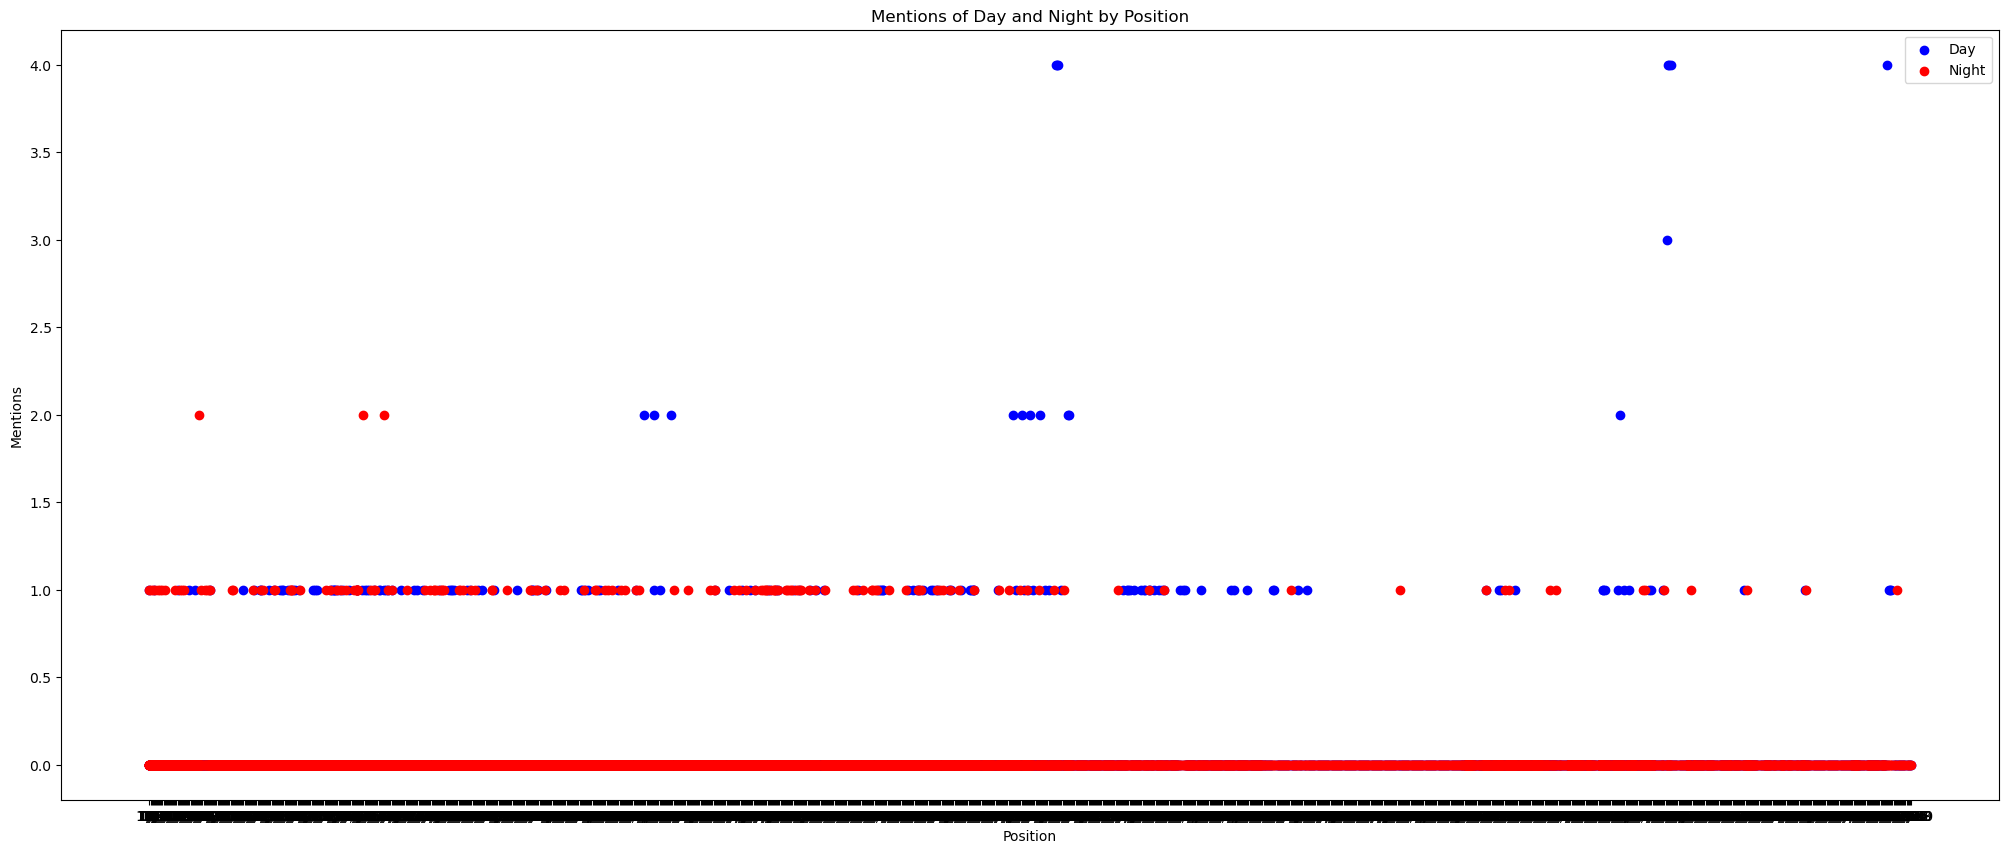

In [67]:
# Create a new chart that shows the mentions of day vs night by position
plt.figure(figsize=(25,10))
plt.scatter(combined_data['position'], combined_data['day_count'], color='blue', label='Day')
plt.scatter(combined_data['position'], combined_data['night_count'], color='red', label='Night')
plt.title('Mentions of Day and Night by Position')
plt.xlabel('Position')
plt.ylabel('Mentions')
plt.legend()

Honestly we cannot see that much -- we can't see any strong trends here.

#### 10. Tokenize the lyrics

Tokenization is a special way of breaking up words that is a little more nuanced than just using white space. The output is a list of words that we can then perform text analysis on.

We will use the word_tokenize function from NLTK (the Natural Language ToolKit), and apply it to every row in our DataFrame with a lambda expression.

1. Run the cell to tokenize the cleaned lyrics.
2. Inspect the first few rows of the lyrics DataFrame
3. Create a list of all the tokens in the lyrics_tok column into one list
4. Use the Counter function from the collections package to count the number of times each word appears
5. Sort the resulting dictionary